# COVID / Unemployment data exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [44]:
#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029301

# unemployment data by province since 2001
ue = pd.read_csv('1410029301_databaseLoadingData_unemp2001.csv')
ue = ue.loc[ue.GEO == 'Canada']

ue['MONTH'] = pd.to_datetime(ue.REF_DATE)
ue['MONTH'] = ue['MONTH'].dt.strftime("%m")
ue19 = ue.loc[ue.REF_DATE.str.contains("2019")]
ue20 = ue.loc[ue.REF_DATE.str.contains("2020")]


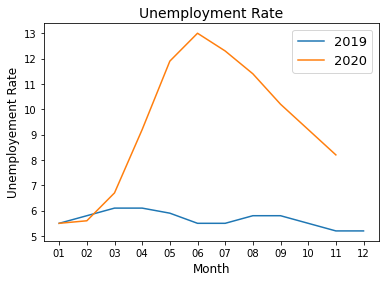

In [49]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (6,4))
ax.plot(ue19.MONTH, ue19.VALUE, label = '2019')
ax.plot(ue20.MONTH, ue20.VALUE, label = '2020')
plt.title('Unemployment Rate', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.show()

<AxesSubplot:>

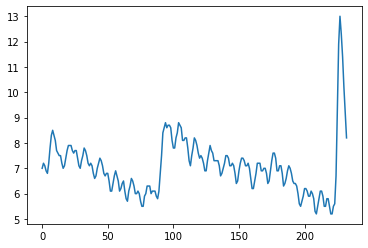

In [47]:
ue.VALUE.plot()

In [1]:
#https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html

# total covid cases Canada
covid = pd.read_csv('covid19-download.csv')
covid = covid.loc[covid.prname == 'Canada']
covid = covid.reset_index(drop=True)
covid['date'] = pd.to_datetime(covid.date, format='%y%m%d')
covid['delta'] = covid.numconf.shift(periods=1)
covid['delta'] =  covid.numconf - covid.delta 
covid['delta'].iat[0] = 4 # hard code first val
covid

NameError: name 'pd' is not defined

In [ ]:

# covid

In [ ]:
#cov.numconf.plot()
# daily 
# covid.delta.plot(x=covid.date)
covid.tail()

In [ ]:
#https://data.oecd.org/unemp/unemployment-rate.htm

# unemployment rate for OECD
oecd = pd.read_csv('DP_LIVE_17122020011457488.csv')

In [ ]:
oecd = oecd.loc[oecd.LOCATION == 'USA']
# oecd = oecd.loc[oecd.LOCATION == 'CAN']
oecd.TIME = pd.to_datetime(oecd.TIME)
oecd.LOCATION.unique()

In [ ]:
oecd.Value.plot()

In [ ]:
#https://ourworldindata.org/coronavirus-source-data

# covid cases by country
owid = pd.read_csv('owid-covid-data.csv')
owid 

In [ ]:
owid = owid.loc[owid.iso_code == 'USA']
owid['date'] = pd.to_datetime(owid.date)
# display(owid.head(50))
# owid['new_cases'] == covid['delta'] 
owid.new_cases.plot(figsize=(12,4), y=owid.date), owid.new_cases_smoothed.plot()